### 목표: gate30 버전과 gate 40버전 검정
- version의  gate_30, gate_40을 활용하여 유저 리텐션& 고착도& 부트스트랩 
- 각각의 version을 분석해보고 게임횟수& 게임 1일 이내 복귀, 게임 7일이내 복귀 
데이터를 활용하여 A/B 테스트 진행 

In [1]:
import pandas as pd
a = pd.read_csv(r'C:\Users\edgar\Desktop\개인태블로\파이널\df_final.csv')
a

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:17:58,...,maua,SP,-23.583452,-46.586284,-23.675542,-46.442547,3,"credit_card, voucher",1,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,9 days 09:15:17,2 days 18:39:27,...,maua,SP,-23.564977,-46.536043,-23.675542,-46.442547,1,credit_card,3,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,7 days 05:29:59,4 days 23:46:46,...,maua,SP,-23.532175,-46.626106,-23.675542,-46.442547,1,credit_card,1,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,5 days 05:55:01,13 days 15:50:48,...,maua,SP,-27.553442,-48.500027,-23.675542,-46.442547,1,boleto,1,44.09
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,6 days 04:56:24,6 days 05:13:27,...,maua,SP,-23.494316,-46.364539,-23.675542,-46.442547,1,credit_card,1,83.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97902,8cca5f9f04056cb2d8abb9b845e89b62,7573237856d19beef367370dd2285f37,delivered,2018-05-12 07:21:13,2018-05-12 07:35:42,2018-05-14 14:59:00,2018-05-18 20:44:31,2018-06-04,16 days 03:15:29,6 days 13:08:49,...,castro pires,MG,-23.076283,-45.537869,-17.853492,-41.486181,1,credit_card,6,359.91
97903,c003c1face3c31cba0af4ab5314f3332,3338d6f3767b6853a4ec283edc2a7b21,delivered,2017-08-07 10:50:46,2017-08-07 11:05:09,2017-08-18 16:20:09,2017-08-21 21:16:43,2017-08-25,3 days 02:43:17,14 days 10:11:34,...,mogi das cruzes,SP,-23.459335,-46.931368,-23.519930,-46.184544,1,credit_card,5,53.72
97904,1e13bca551a3fd095b40e24798569805,423852dab82b7c8333f71b06f3a6fd77,delivered,2018-03-21 11:17:37,2018-03-21 11:30:19,2018-03-23 02:18:55,2018-03-28 16:53:38,2018-04-19,21 days 07:06:22,7 days 05:23:19,...,belo horizonte,MG,-6.927333,-37.102947,-19.931592,-43.953089,1,credit_card,5,137.10
97905,4442d1fdf454197e9e141f0d83a9031e,3c3c45651f50bb4b13a4de268cad02b0,delivered,2017-02-03 18:08:16,2017-02-04 07:01:55,2017-02-20 10:49:53,2017-03-01 11:24:45,2017-03-06,4 days 12:35:15,25 days 04:22:50,...,guarulhos,SP,-30.895906,-55.503034,-23.409419,-46.394785,1,boleto,1,1323.79



- userid: 각 플레이어를 식별하는 고유한 번호
- version: gate_30& gate_40 버전(게임 에서 gate_30& gate_40 관문에 도달 하면 광고& 인앱 구매 유도 광고 발생)
- sum_gamerounds: 게임 설치 후 첫 주에 플레이어가 플레이한 게임 라운드 수
- retention_1: 유저의 1일 이내 게임 복귀 여부
- retention_7: 유저의 7일 이내 게임 복귀 여부



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\edgar\Desktop\cookie_cats(게임).csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [4]:
def file(df,  head=5):
    print('행 열 파악')
    print(df.shape)
    
    print('--------------------')
    print('데이터 정보')
    print(df.info())
    
    print('--------------------')
    print('null값')
    print(df.isnull().sum())
    

    print('--------------------')
    print('통계요약')
    print(df.describe())
    
file(df)

행 열 파악
(90189, 5)
--------------------
데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None
--------------------
null값
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64
--------------------
통계요약
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06 

- max값이 굉장히 비정상적으로 크다

In [5]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


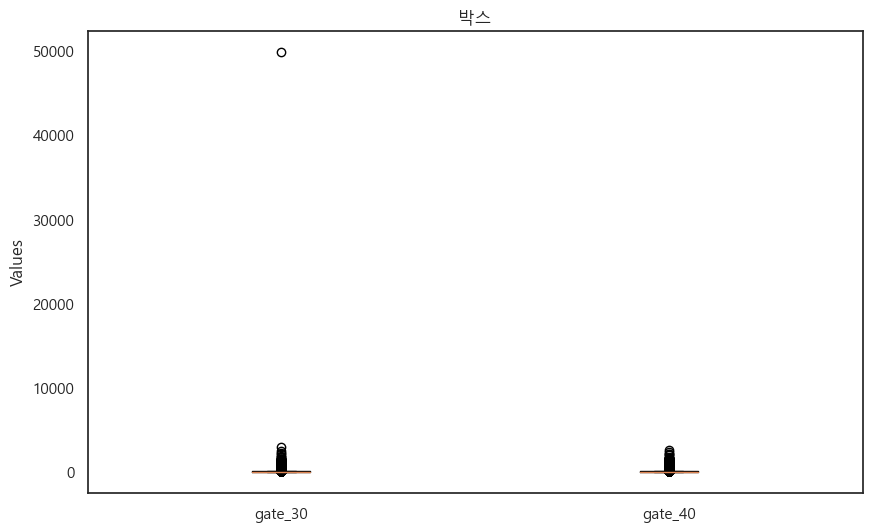

In [6]:
from matplotlib import rc

rc('font', family = 'Malgun Gothic')


data1 = df[df['version'] == 'gate_30']['sum_gamerounds']
data2 = df[df['version'] == 'gate_40']['sum_gamerounds']

plt.figure(figsize=(10, 6))
plt.boxplot([data1, data2])

plt.xticks([1, 2], ['gate_30', 'gate_40'])  # X축 레이블
plt.ylabel('Values')
plt.title('박스')

plt.show()

In [7]:
# gate_30에 결측값 발견 결측값 제외

df[df['version'] == 'gate_30'][df['sum_gamerounds'] > 3000]
df = df[df['sum_gamerounds'] < 3000]

In [8]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [9]:
# 시각화& 리텐션, 고착도 지표 계산& 부트스트랩 프로젝트 진행을 하기 위해 
# bool 타입의 retention_1 retention 7 을 숫자(이진화)로 변경

import numpy as np
df['retention_1'] = np.where(df['retention_1'] == True, 1, 0)
df['retention_7'] = np.where(df['retention_7'] == True, 1, 0)

In [10]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


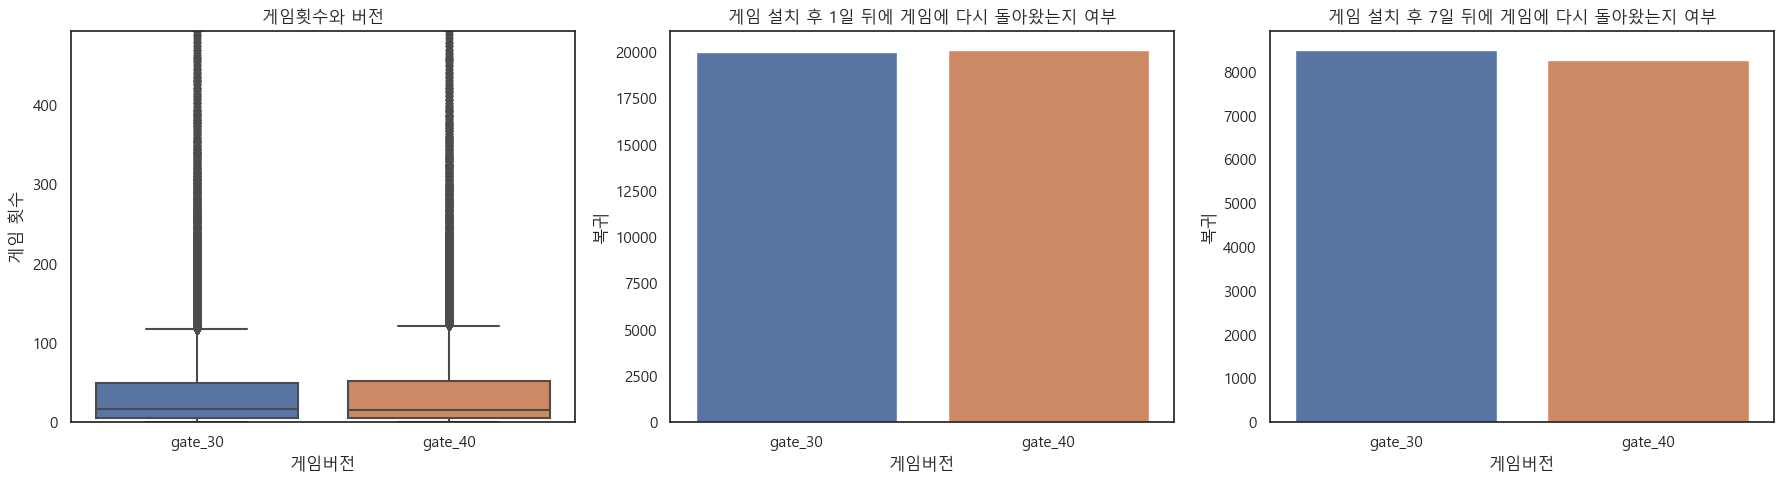

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
sns.boxplot(data = df, x = df['version'], y = df['sum_gamerounds'] , ax=axes[0])
axes[0].set_title('게임횟수와 버전')
axes[0].set_xlabel('게임버전')
axes[0].set_ylabel('게임 횟수')
axes[0].set_ylim(0, df['sum_gamerounds'].quantile(0.99))



retention_1_count = df.groupby('version')['retention_1'].sum().reset_index()
sns.barplot(data=retention_1_count, x='version', y='retention_1', ax=axes[1])
axes[1].set_title('게임 설치 후 1일 뒤에 게임에 다시 돌아왔는지 여부')
axes[1].set_xlabel('게임버전')
axes[1].set_ylabel('복귀')



retention_7_count = df.groupby('version')['retention_7'].sum().reset_index()
sns.barplot(data = retention_7_count, x = 'version', y = 'retention_7', ax= axes[2])
axes[2].set_title("게임 설치 후 7일 뒤에 게임에 다시 돌아왔는지 여부")
axes[2].set_xlabel('게임버전')
axes[2].set_ylabel('복귀')


plt.tight_layout()
plt.show()

모바일 게임 버전의 2개인 gate_30과 gate_40 의 플레이한 게임 횟수(sum_gamerounds)의 분포를 비교 및 각 커널 밀도 곡선 아래의 면적은 해당 버전에서 관찰된 게임 횟수의 비율을나타낸다.



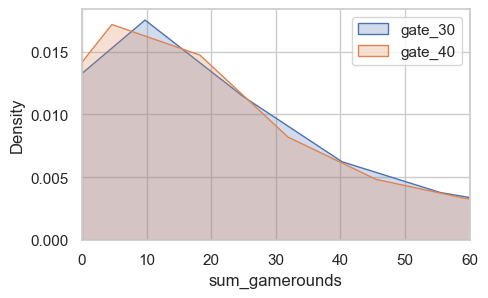

In [12]:
# 게임 버전별 게임횟수 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  

sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30')
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40')
plt.gcf().set_size_inches(5, 3)
plt.legend()
plt.xlim(0, 60)
plt.show()



x축의 값은 게임 플레이 횟수 

y축은 해당 게임 횟수에서의 밀도를 나타낸다. 이 값은 실제 확률이나 빈도수를 나타내는 것이 아니라, 밀도 함수에 기반한 추정치

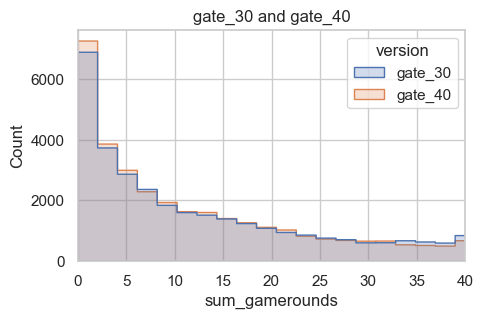

In [14]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="sum_gamerounds", hue="version", element="step", stat="count")
plt.xlim(0, 40)
plt.title("gate_30 and gate_40")
plt.show()

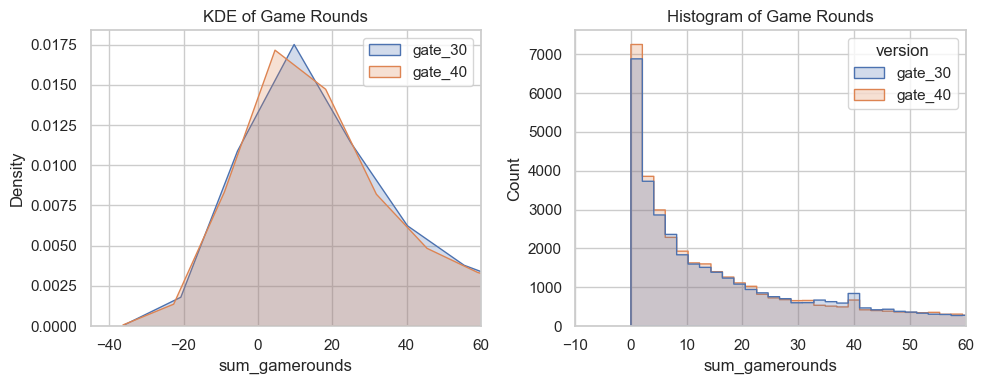

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 두 개의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.kdeplot(df[df['version']=='gate_30']['sum_gamerounds'], shade=True, label='gate_30', ax=axes[0])
sns.kdeplot(df[df['version']=='gate_40']['sum_gamerounds'], shade=True, label='gate_40', ax=axes[0])
axes[0].set_title('KDE of Game Rounds')
axes[0].set_xlim(-45, 60)
axes[0].legend()


sns.histplot(data=df, x="sum_gamerounds", hue="version", element="step", stat="count", ax=axes[1])
axes[1].set_xlim(-10, 60)
axes[1].set_title('Histogram of Game Rounds')

plt.tight_layout()
plt.show()

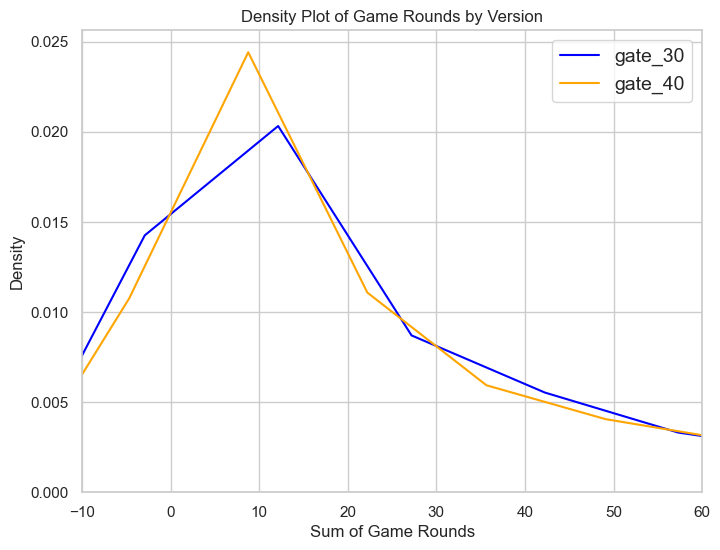

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.kdeplot(data=df[df['version'] == 'gate_30']['sum_gamerounds'], label='gate_30', color='blue', bw_adjust=0.5)
sns.kdeplot(data=df[df['version'] == 'gate_40']['sum_gamerounds'], label='gate_40', color='orange', bw_adjust=0.5)


plt.xlim(-10, 60)
plt.title('Density Plot of Game Rounds by Version')
plt.xlabel('Sum of Game Rounds')
plt.ylabel('Density')
plt.legend(prop={'size': 14})  
plt.show()

### 복귀 유저와 미복귀 유저의 게임 플레이 최소& 최대& 평균& 중앙값 확인

In [17]:
grouped_df1 = df.groupby(['version', 'retention_1']).agg({'sum_gamerounds': ['count','median', 'mean', 'std', 'max'] }).reset_index()
grouped_df1

version retention_1 sum_gamerounds                                    
                                count median       mean         std   max
0  gate_30           0          24665    6.0  16.359092   36.528426  1072
1  gate_30           1          20034   48.0  94.411700  135.037697  2961
2  gate_40           0          25370    6.0  16.340402   35.925756  1241
3  gate_40           1          20119   49.0  95.381182  137.887256  2640

In [18]:
grouped_df2 = df.groupby(['version', 'retention_7']).agg({'sum_gamerounds': ['count','median', 'mean', 'std', 'max'] }).reset_index()
grouped_df2

version retention_7 sum_gamerounds                                     
                                count median        mean         std   max
0  gate_30           0          36198   11.0   25.796508   43.316158   981
1  gate_30           1           8501  105.0  160.117516  179.358560  2961
2  gate_40           0          37210   11.0   25.856356   44.406112  2640
3  gate_40           1           8279  111.0  165.649837  183.792499  2294

## 모바일 게임의 2개 버전애 따른 유저 복귀& 미복귀 인원 확인

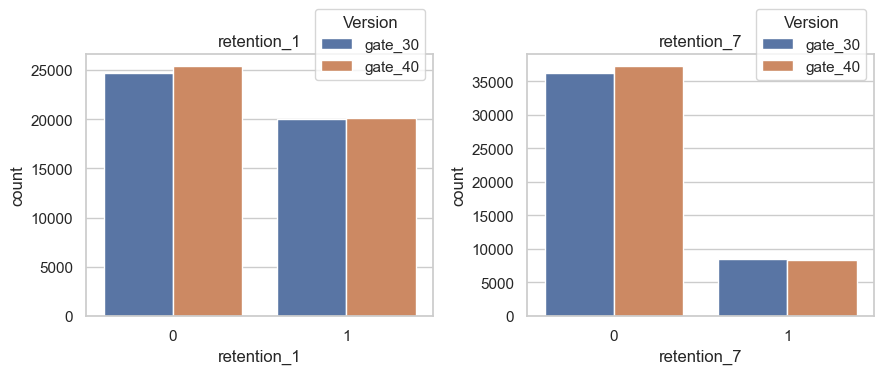

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(9, 4)) 


sns.countplot(x='retention_1', hue='version', data=df, ax=axes[0])
axes[0].set_title('retention_1')
axes[0].legend(title='Version', loc='upper right', bbox_to_anchor=(1.00, 1.2))


sns.countplot(x='retention_7', hue='version', data=df, ax=axes[1])
axes[1].set_title('retention_7')
axes[1].legend(title='Version', loc='upper right', bbox_to_anchor=(1.00, 1.2))

plt.tight_layout()
plt.show()



In [25]:

gate_30_retention_1_true_count = df[(df['version'] == 'gate_30') & (df['retention_1'] == 1)].shape[0]
gate_30_retention_1_false_count = df[(df['version'] == 'gate_30') & (df['retention_1'] == 0)].shape[0]
print(f"버전 30의 1일 복귀 사용자 수: {gate_30_retention_1_true_count}")
print(f"버전 30의 1일 미복귀 사용자 수: {gate_30_retention_1_false_count}")


gate_30_retention_7_true_count = df[(df['version'] == 'gate_30') & (df['retention_7'] == 1)].shape[0]
gate_30_retention_7_false_count = df[(df['version'] == 'gate_30') & (df['retention_7'] == 0)].shape[0]
print(f"버전 30의 7일 복귀 사용자 수: {gate_30_retention_7_true_count}")
print(f"버전 30의 7일 미복귀 사용자 수: {gate_30_retention_7_false_count}")


버전 30의 1일 복귀 사용자 수: 20034
버전 30의 1일 미복귀 사용자 수: 24665
버전 30의 7일 복귀 사용자 수: 8501
버전 30의 7일 미복귀 사용자 수: 36198


In [26]:
# 게임 설치 후 'gate_30' 버전의 1일 및 7일 이내 유저 게임 복귀 및 미복귀 사용자 수 계산하고 출력
# 버전 30의 1일 복귀 여부 계산
gate_30_retention_1_false = df[(df['version'] == 'gate_30') & (df['retention_1'] == 0)].shape[0]
gate_30_retention_1_true = df[(df['version'] == 'gate_30') & (df['retention_1'] == 1)].shape[0]

# 버전 30의 7일 복귀 여부 계산
gate_30_retention_7_false = df[(df['version'] == 'gate_30') & (df['retention_7'] == 0)].shape[0]
gate_30_retention_7_true = df[(df['version'] == 'gate_30') & (df['retention_7'] == 1)].shape[0]

print("버전 30의 사용자 복귀 현황")
print("-------------------------------------")
print(f"1일 미복귀 사용자 수: {gate_30_retention_1_false}")
print(f"1일 복귀 사용자 수: {gate_30_retention_1_true}")
print("-------------------------------------")
print(f"7일 미복귀 사용자 수: {gate_30_retention_7_false}")
print(f"7일 복귀 사용자 수: {gate_30_retention_7_true}")


버전 30의 사용자 복귀 현황
-------------------------------------
1일 미복귀 사용자 수: 24665
1일 복귀 사용자 수: 20034
-------------------------------------
7일 미복귀 사용자 수: 36198
7일 복귀 사용자 수: 8501


- gate_30,40 버전의 1일 복귀 유저랑    gate_30,40 버전의 7일 복귀 유저간  게임플레이 라운드수가 큰 차이를 보이며
7일 복귀 유저는 게임 라운드 수가 매우 높다


# 고객 리텐션율 구하기

In [41]:
# 1일차에 게임 실행한 사용자 수
df['first_day_user'] = 1  # 모든 사용자를 첫 사용자로 가정

retention_stats = df.groupby('version').agg({
    'retention_1': 'sum',
    'retention_7': 'sum',
    'first_day_user': 'sum'
}).reset_index()

retention_stats['retention_1_rate'] = retention_stats['retention_1'] / retention_stats['first_day_user']
retention_stats['retention_7_rate'] = retention_stats['retention_7'] / retention_stats['first_day_user']

retention_stats

,version,retention_1,retention_7,first_day_user,retention_1_rate,retention_7_rate
0,gate_30,20034,8501,44699,0.448198,0.190183
1,gate_40,20119,8279,45489,0.442283,0.182000


In [42]:
# 각 버전의 초기 사용자 수 계산
initial_users_gate_30 = df[df['version'] == 'gate_30'].shape[0]
initial_users_gate_40 = df[df['version'] == 'gate_40'].shape[0]

# 각 버전의 1일 복귀 사용자 수 계산
retention_1_gate_30 = df[(df['version'] == 'gate_30') & (df['retention_1'] == 1)].shape[0]
retention_1_gate_40 = df[(df['version'] == 'gate_40') & (df['retention_1'] == 1)].shape[0]

# 각 버전의 7일 복귀 사용자 수 계산
retention_7_gate_30 = df[(df['version'] == 'gate_30') & (df['retention_7'] == 1)].shape[0]
retention_7_gate_40 = df[(df['version'] == 'gate_40') & (df['retention_7'] == 1)].shape[0]


retention_rate_1_gate_30 = (retention_1_gate_30 / initial_users_gate_30) * 100
retention_rate_1_gate_40 = (retention_1_gate_40 / initial_users_gate_40) * 100
retention_rate_7_gate_30 = (retention_7_gate_30 / initial_users_gate_30) * 100
retention_rate_7_gate_40 = (retention_7_gate_40 / initial_users_gate_40) * 100
print(f"버전 gate_30의 1일 리텐션율: {retention_rate_1_gate_30}%")
print(f"버전 gate_40의 1일 리텐션율: {retention_rate_1_gate_40}%")
print(f"버전 gate_30의 7일 리텐션율: {retention_rate_7_gate_30}%")
print(f"버전 gate_40의 7일 리텐션율: {retention_rate_7_gate_40}%")


버전 gate_30의 1일 리텐션율: 44.81979462627799%
버전 gate_40의 1일 리텐션율: 44.22827496757458%
버전 gate_30의 7일 리텐션율: 19.018322557551624%
버전 gate_40의 7일 리텐션율: 18.200004396667328%


# 각 버전별 1& 7일 이내 복귀(부트스트랩) 
-  개의 게임 버전(gate_30과 gate_40)에 대한 1일 리텐션(retention_1)을 비교하기 위한 부트스트랩 분석을 수행
-  부트스트랩 분석의 목적은 두 게임 버전 간의 1일 리텐션율에 차이가 있는지 구체적으로 검증 하기 위함

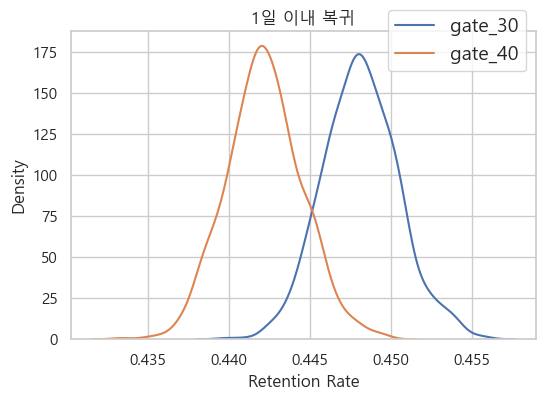

In [51]:
from matplotlib import rc

rc('font', family = 'Malgun Gothic')
bootstrap_samples = 1000 # 1000번 샘플 복원
diffs_30 = []
diffs_40 = []

for i in range(bootstrap_samples):
    # 각 그룹에서 복원 추출
    sample_30 = df[df['version'] == 'gate_30']['retention_1'].sample(frac=1, replace=True)
    sample_40 = df[df['version'] == 'gate_40']['retention_1'].sample(frac=1, replace=True)
    
    # 각 그룹의 평균 추가
    diffs_30.append(sample_30.mean())
    diffs_40.append(sample_40.mean())


plt.figure(figsize=(6, 4))
sns.kdeplot(diffs_30, label='gate_30')
sns.kdeplot(diffs_40, label='gate_40')
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.title('1일 이내 복귀')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.1), prop={'size': 14})

plt.show()

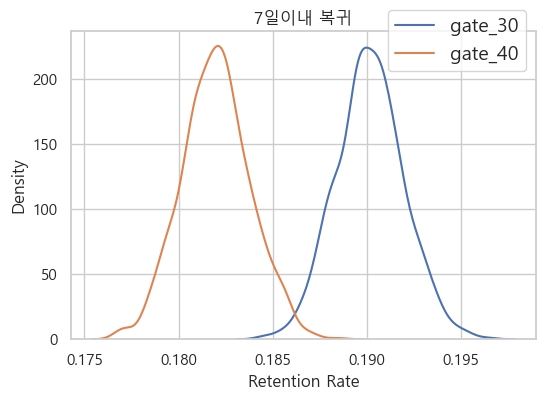

In [52]:
from matplotlib import rc

rc('font', family = 'Malgun Gothic')
bootstrap_samples = 1000
diffs_30 = []
diffs_40 = []

for i in range(bootstrap_samples):
    # 각 그룹에서 복원 추출
    sample_30 = df[df['version'] == 'gate_30']['retention_7'].sample(frac=1, replace=True)
    sample_40 = df[df['version'] == 'gate_40']['retention_7'].sample(frac=1, replace=True)
    
    # 각 그룹의 평균 추가
    diffs_30.append(sample_30.mean())
    diffs_40.append(sample_40.mean())


plt.figure(figsize=(6, 4))
sns.kdeplot(diffs_30, label='gate_30')
sns.kdeplot(diffs_40, label='gate_40')
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.title('7일이내 복귀')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.1), prop={'size': 14})
plt.show()


### Stickiness 고착도 (사용자들이 얼마나 자주 게임이나 앱에 돌아오는지를 나타내는 지표)
- DAU: 하루 동안 게임이나 앱을 사용한 고유 사용자 수(일일 사용자 참여도를 나타낸다.)
- MAU: 한 달 동안 게임을 이용한 사용자 수(월간 사용자 참여도 나타낸다.)
- 여기서는  MAU가 존재하지 않아 대체 데이터로 7일 이내 게임 복귀(retention_7) 사용
- Stickiness = DAU/MAU 앱의 재방문 정도를 관리해 앱의 활성화, 의존도를 알 수 있는 지표
- (일일 활성 사용자) / (월간 활성 사용자) = 고착도

In [45]:
stickiness_stats = df.groupby('version').agg({
    'retention_1': 'mean',  
    'retention_7': 'mean'   
}).reset_index()

stickiness_stats['stickiness'] = stickiness_stats['retention_1'] / stickiness_stats['retention_7']
stickiness_stats


,version,retention_1,retention_7,stickiness
0,gate_30,0.448198,0.190183,2.356664
1,gate_40,0.442283,0.182000,2.430124


### 정규성 검사
- Shapiro-Wilk

# Shapiro

In [119]:
from scipy.stats import shapiro


retention_1_gate_30 = df[df['version'] == 'gate_30']['retention_1']
retention_1_gate_40 = df[df['version'] == 'gate_40']['retention_1']
stat_1_30, p_1_30 = shapiro(retention_1_gate_30)
stat_1_40, p_1_40 = shapiro(retention_1_gate_40)


retention_7_gate_30 = df[df['version'] == 'gate_30']['retention_7']
retention_7_gate_40 = df[df['version'] == 'gate_40']['retention_7']
stat_7_30, p_7_30 = shapiro(retention_7_gate_30)
stat_7_40, p_7_40 = shapiro(retention_7_gate_40)

print("gate_30, 1일 후 복귀율 Shapiro-Wilk 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_1_30, p_1_30))
print("gate_40, 1일 후 복귀율 Shapiro-Wilk 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_1_40, p_1_40))
print("gate_30, 7일 후 복귀율 Shapiro-Wilk 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_7_30, p_7_30))
print("gate_40, 7일 후 복귀율 Shapiro-Wilk 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_7_40, p_7_40))


gate_30, 1일 후 복귀율 Shapiro-Wilk 검정: 통계량 = 0.632, p-값 = 0.000
gate_40, 1일 후 복귀율 Shapiro-Wilk 검정: 통계량 = 0.632, p-값 = 0.000
gate_30, 7일 후 복귀율 Shapiro-Wilk 검정: 통계량 = 0.479, p-값 = 0.000
gate_40, 7일 후 복귀율 Shapiro-Wilk 검정: 통계량 = 0.469, p-값 = 0.000


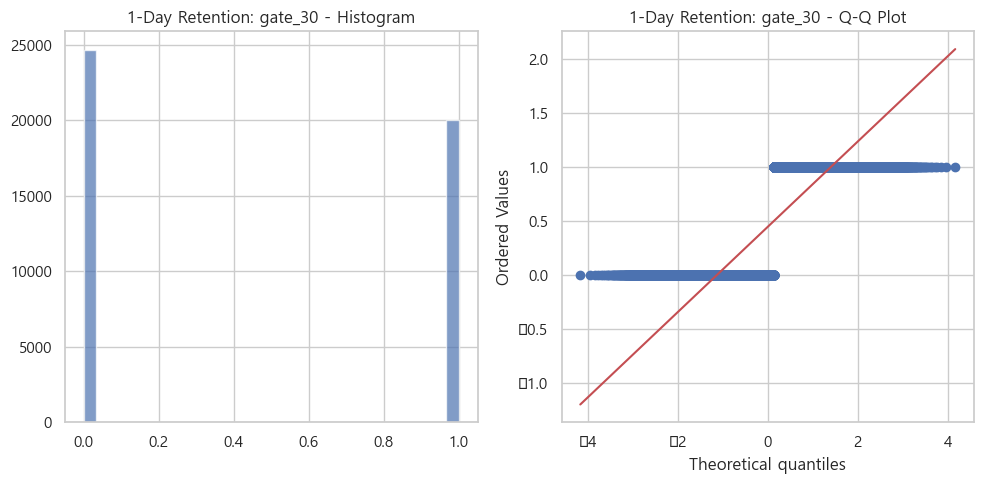

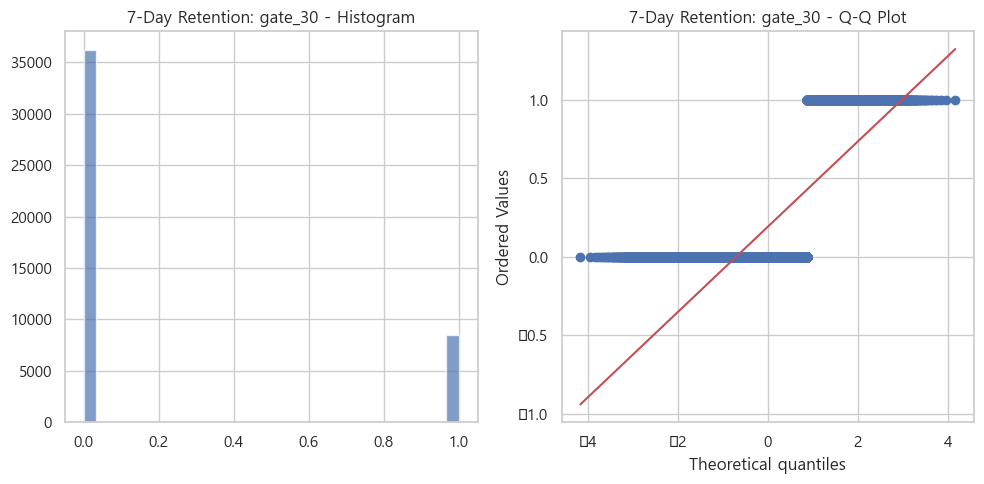

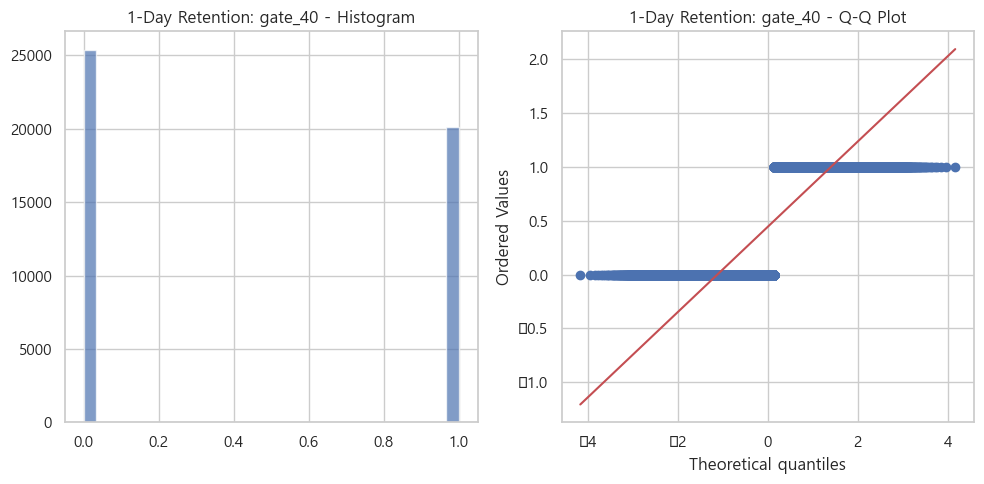

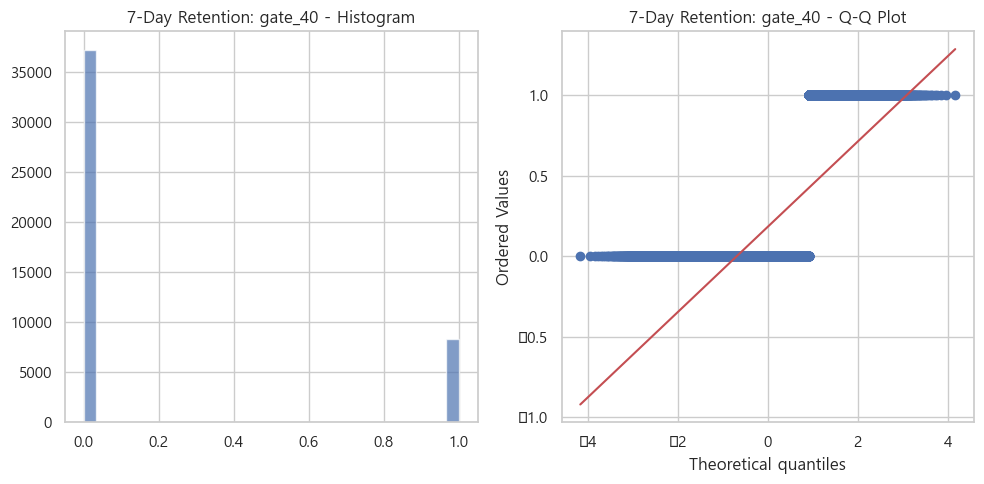

In [120]:
import matplotlib.pyplot as plt
import scipy.stats as stats


def plot_data(version, retention, title):
    data = df[df['version'] == version][retention]
    plt.figure(figsize=(10, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, alpha=0.7)
    plt.title(f'{title}: {version} - Histogram')

    # Q-Q 플롯
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'{title}: {version} - Q-Q Plot')

    plt.tight_layout()
    plt.show()


plot_data('gate_30', 'retention_1', '1-Day Retention')
plot_data('gate_30', 'retention_7', '7-Day Retention')
plot_data('gate_40', 'retention_1', '1-Day Retention')
plot_data('gate_40', 'retention_7', '7-Day Retention')


### 정규성 결과
- 정규 분포를 따르지 않으며 이는 복귀 데이터를 이진화 했기 때문

### 비 모수적 검정 
- MannWhitney U
- Chi-Square
- Wilcoxon
- Fisher

# MannWhitneyu

In [121]:
from scipy.stats import mannwhitneyu

# 1일 후 복귀율(retention_1)에 대한 Mann-Whitney U 검정
retention_1_gate_30 = df[df['version'] == 'gate_30']['retention_1']
retention_1_gate_40 = df[df['version'] == 'gate_40']['retention_1']
stat_1, p_1 = mannwhitneyu(retention_1_gate_30, retention_1_gate_40)

# 7일 후 복귀율(retention_7)에 대한 Mann-Whitney U 검정
retention_7_gate_30 = df[df['version'] == 'gate_30']['retention_7']
retention_7_gate_40 = df[df['version'] == 'gate_40']['retention_7']
stat_7, p_7 = mannwhitneyu(retention_7_gate_30, retention_7_gate_40)


print("1일 후 복귀율 Mann-Whitney U 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_1, p_1))
print("7일 후 복귀율 Mann-Whitney U 검정: 통계량 = %.3f, p-값 = %.3f" % (stat_7, p_7))


1일 후 복귀율 Mann-Whitney U 검정: 통계량 = 1022670128.000, p-값 = 0.074
7일 후 복귀율 Mann-Whitney U 검정: 통계량 = 1024975889.500, p-값 = 0.002


### Chi-Square

In [128]:
# 1일 이내 게임 복귀 데이터 카이 제곱


from scipy.stats import chi2_contingency
import pandas as pd

# version과 retention_1을 기준으로 교차 테이블 생성
contingency_table = pd.crosstab(df['version'], df['retention_1'])
chi2_result, p_val, dof, expected = chi2_contingency(contingency_table)

# 예상 빈도수 테이블
expected_table = pd.DataFrame(expected, columns=['0', '1'], index=contingency_table.index)


print(
    '  ',
    '[Chi-square Analysis Result Report]',
    'Chi-square: {}'.format(round(chi2_result, 5)),
    'P-value: {}'.format(round(p_val, 5)),
    '--------------------------',
    'Expected Values',
    expected_table,
    '--------------------------',
    'Observed Values',
    contingency_table,
    '==========================',
    ' ',
    sep='\n'
)

  
[Chi-square Analysis Result Report]
Chi-square: 3.16984
P-value: 0.07501
--------------------------
Expected Values
                    0             1
version                            
gate_30  24798.359704  19900.640296
gate_40  25236.640296  20252.359704
--------------------------
Observed Values
retention_1      0      1
version                  
gate_30      24665  20034
gate_40      25370  20119
 


In [129]:
from scipy.stats import chi2_contingency
import pandas as pd

# version과 retention_7을 기준으로 교차 테이블 생성
contingency_table_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_result_7, p_val_7, dof_7, expected_7 = chi2_contingency(contingency_table_7)

# 예상 빈도수 테이블
expected_table_7 = pd.DataFrame(expected_7, columns=['0', '1'], index=contingency_table_7.index)


print(
    '  ',
    '[Chi-square Analysis Result Report]',
    'Chi-square: {}'.format(round(chi2_result_7, 5)),
    'P-value: {}'.format(round(p_val_7, 5)),
    '--------------------------',
    'Expected Values',
    expected_table_7,
    '--------------------------',
    'Observed Values',
    contingency_table_7,
    '==========================',
    ' ',
    sep='\n'
)

  
[Chi-square Analysis Result Report]
Chi-square: 9.91528
P-value: 0.00164
--------------------------
Expected Values
                    0            1
version                           
gate_30  36382.492039  8316.507961
gate_40  37025.507961  8463.492039
--------------------------
Observed Values
retention_7      0     1
version                 
gate_30      36198  8501
gate_40      37210  8279
 


# wilcoxon

In [131]:
# 1일 이내 wilcoxon 검정 결과
from scipy.stats import ranksums

retention_30 = df[df['version'] == 'gate_30']['retention_1']
retention_40 = df[df['version']== 'gate_40']['retention_1']

stat, p_value = ranksums(retention_30, retention_40)

print(f"Wilcoxon 순위합 검정 결과: 통계량 = {stat}, p-value = {p_value}")

Wilcoxon 순위합 검정 결과: 통계량 = 1.5383498825255768, p-value = 0.12396308924372965


In [132]:
# 7일 이내 wilcoxon 검정 결과
retention_30 = df[df['version'] == 'gate_30']['retention_7']
retention_40 = df[df['version']== 'gate_40']['retention_7']

stat, p_value = ranksums(retention_30, retention_40)

print(f"Wilcoxon 순위합 검정 결과: 통계량 = {stat}, p-value = {p_value}")

Wilcoxon 순위합 검정 결과: 통계량 = 2.1281788832247273, p-value = 0.03332225495356346


# Fisher 검정

In [133]:
from scipy.stats import fisher_exact

# 1일 이내 복귀에 대한 2x2 분할 표 생성
retention_1_table = pd.crosstab(df['version'], df['retention_1'])
odds_ratio_1, p_value_1 = fisher_exact(retention_1_table)
print(f"Fisher의 정확한 검정 결과 (1일 리텐션): Odds ratio = {odds_ratio_1}, p-value = {p_value_1}")



# 7일 이내 복귀에 대한 2x2 분할 표 생성
retention_7_table = pd.crosstab(df['version'], df['retention_7'])
odds_ratio_7, p_value_7 = fisher_exact(retention_7_table)
print(f"Fisher의 정확한 검정 결과 (7일 리텐션): Odds ratio = {odds_ratio_7}, p-value = {p_value_7}")

Fisher의 정확한 검정 결과 (1일 리텐션): Odds ratio = 0.9763361587626617, p-value = 0.07470295380924759
Fisher의 정확한 검정 결과 (7일 리텐션): Odds ratio = 0.947398673017617, p-value = 0.0016378383114174855
